In [1]:
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#df = pd.read_csv('../CAERS_ASCII_2004_2017Q2.csv')
#fig, ax = plt.subplots(figsize=(12,8))
#sns.countplot(df['CI_Gender'])
#fig, ax = plt.subplots(figsize=(12,8))
#sns.countplot(df['CI_Gender'])

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('CAERS_ASCII_2004_2017Q2.csv')

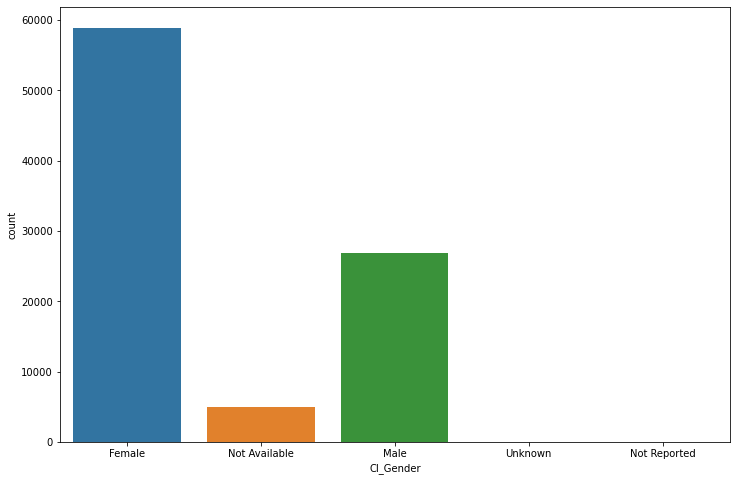

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(df['CI_Gender'])


Text(0.5, 1.0, 'Health event counts by product type')

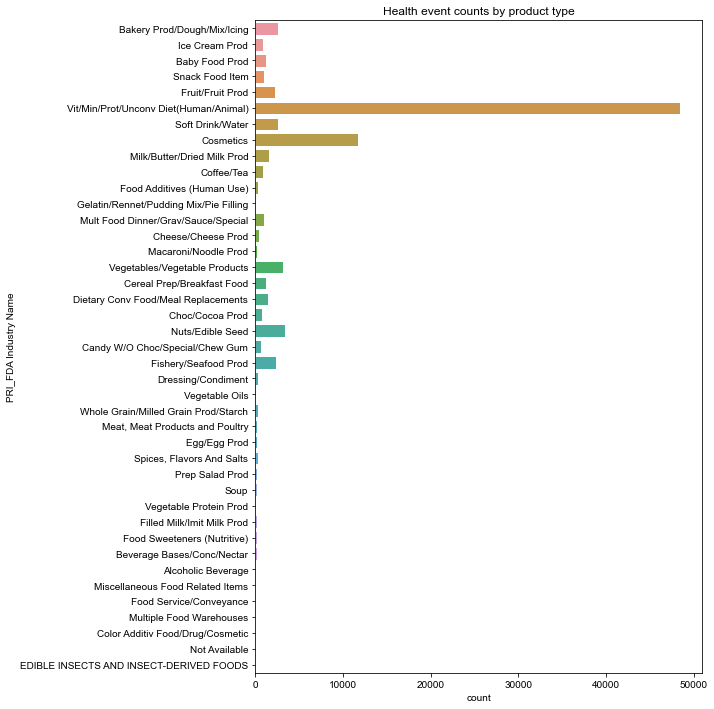

In [5]:
fig, ax = plt.subplots(figsize=(8,12))
sns.set_style("ticks")
sns.countplot(y=df['PRI_FDA Industry Name']).set_title('Health event counts by product type')

Text(0.5, 1.0, 'Health event counts by product type')

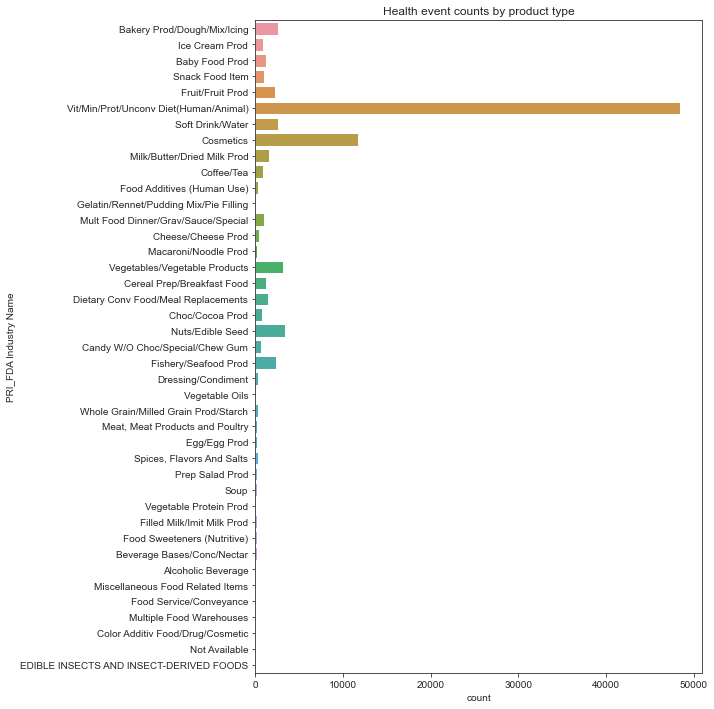

In [6]:
fig, ax = plt.subplots(figsize=(8,12))
sns.set_style("ticks")
sns.countplot(y=df['PRI_FDA Industry Name']).set_title('Health event counts by product type')


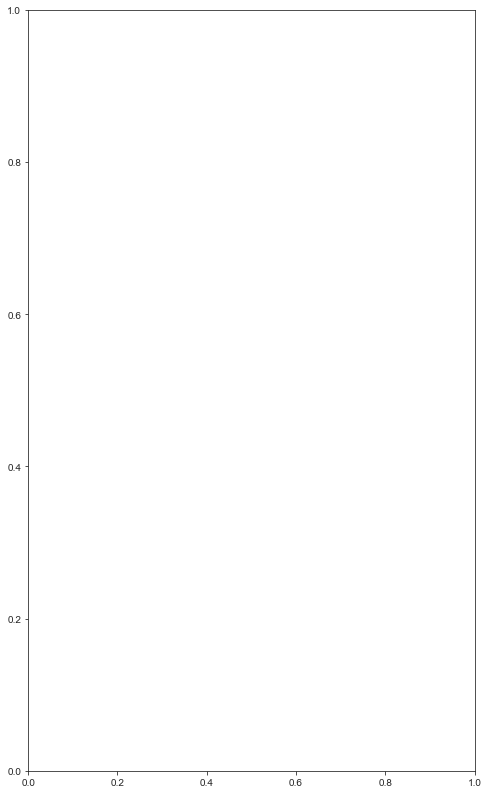

In [7]:
fig, ax = plt.subplots(figsize=(8,14))
product_count=df.groupby('PRI_Reported Brand/Product Name').size()
product_count_large=product_count[(product_count>150) & (product_count.index!='REDACTED')]

Text(0.5, 1.0, 'Products with more than 150 health events')

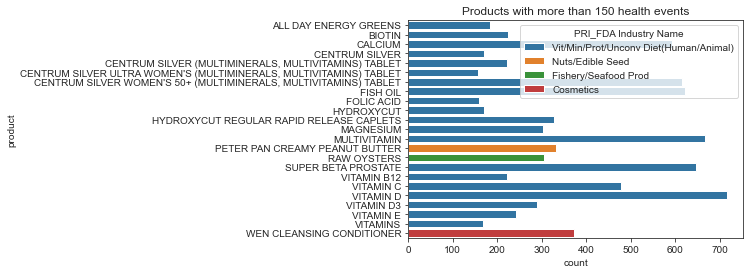

In [8]:
#print(product_count_large)
product_count_df=pd.DataFrame({'product':product_count_large.index,'count':product_count_large}, index=None)
new=product_count_df.merge(df[['PRI_Reported Brand/Product Name','PRI_FDA Industry Name']],how='inner', left_on='product', right_on='PRI_Reported Brand/Product Name').drop_duplicates()[['count','product','PRI_FDA Industry Name']]
sns.barplot(x='count',y='product',hue='PRI_FDA Industry Name',data=new,dodge=False).set_title("Products with more than 150 health events")


Text(0.5, 1.0, 'Health event counts by product type')

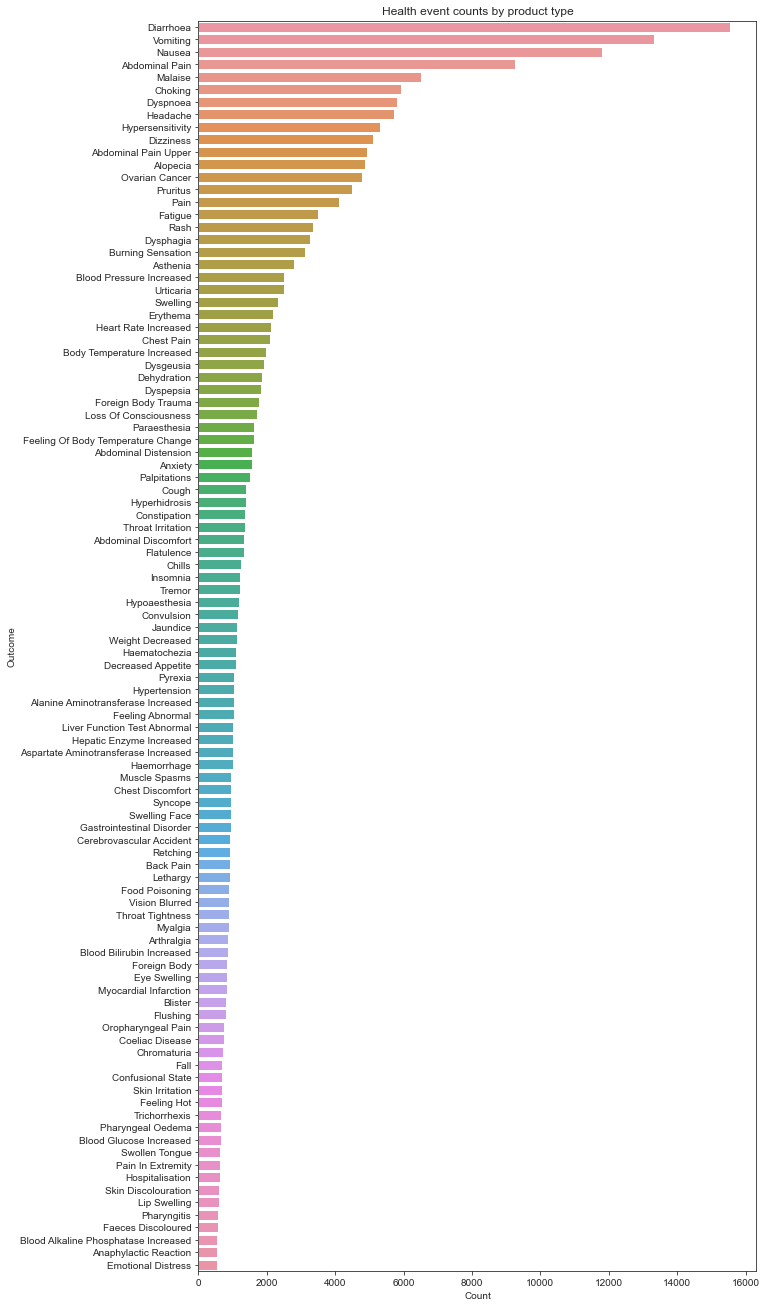

In [9]:
outcomes=[]
for _, reactions in df['SYM_One Row Coded Symptoms'].astype(object).str.split(",").iteritems():
    outcomes += [str(l).strip().title() for l in pd.Series(reactions).astype(object)]

outcome_df=pd.DataFrame({'Outcome':pd.Series(outcomes).value_counts().index, 'Count':pd.Series(outcomes).value_counts()})[:100]
fig, ax = plt.subplots(figsize=(10,23))
sns.barplot(x='Count',y='Outcome', data=outcome_df).set_title('Health event counts by product type')


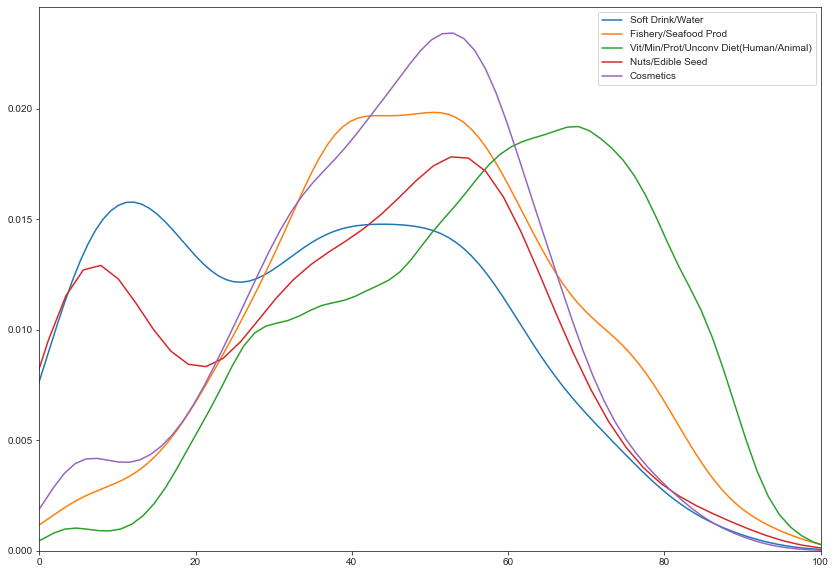

In [10]:
fig, ax = plt.subplots(figsize=(14,10))
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Soft Drink/Water')]['CI_Age at Adverse Event'], label='Soft Drink/Water')
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Fishery/Seafood Prod')]['CI_Age at Adverse Event'], label='Fishery/Seafood Prod')
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Vit/Min/Prot/Unconv Diet(Human/Animal)')]['CI_Age at Adverse Event'], label='Vit/Min/Prot/Unconv Diet(Human/Animal)')
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Nuts/Edible Seed')]['CI_Age at Adverse Event'], label='Nuts/Edible Seed')
ax = sns.kdeplot(df[(df['CI_Age Unit'] == 'Year(s)') & (df['PRI_FDA Industry Name']=='Cosmetics')]['CI_Age at Adverse Event'], label='Cosmetics').set(xlim=(0, 100))



In [11]:
print(df['RA_CAERS Created Date'].max())
print(df['RA_CAERS Created Date'].min())

9/9/2016
1/1/2004


In [12]:
#fig, ax = plt.subplots(figsize=(22,30))
#sns.countplot(y=df['AEC_Event Start Date']).set_title('Health event counts by product type') THIS THROWS ERROR DUE TO BAD DATA - IGNORE

print(df['AEC_Event Start Date'].max())

TypeError: '>=' not supported between instances of 'str' and 'float'

Text(0.5, 1.0, 'Products which were consumed by more than one patient who died')

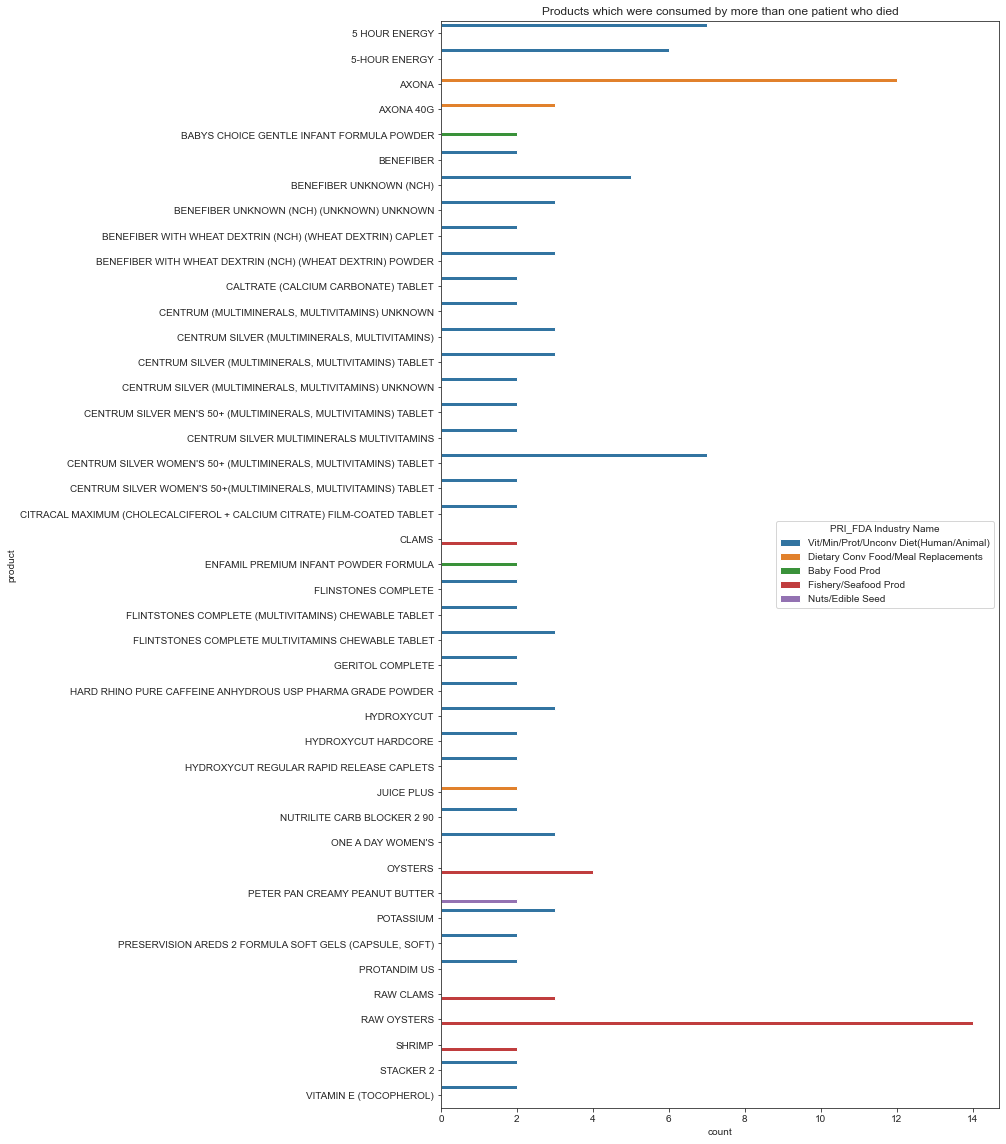

In [13]:
deadly=df[(df['SYM_One Row Coded Symptoms']!=np.NaN) & (df['SYM_One Row Coded Symptoms'].str.contains('DEATH'))]
fig, ax = plt.subplots(figsize=(10,20))
product_count=deadly.groupby('PRI_Reported Brand/Product Name').size()
product_count_large=product_count[(product_count>1) & (product_count.index!='REDACTED')]
product_count_df=pd.DataFrame({'product':product_count_large.index,'count':product_count_large}, index=None)
new=product_count_df.merge(deadly[['PRI_Reported Brand/Product Name','PRI_FDA Industry Name']],how='inner', left_on='product', right_on='PRI_Reported Brand/Product Name').drop_duplicates()[['count','product','PRI_FDA Industry Name']]
sns.barplot(x='count',y='product',hue='PRI_FDA Industry Name',data=new).set_title("Products which were consumed by more than one patient who died")
